In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
energy_data=pd.read_csv('C:/Users/HP/Documents/Hamoye/course 2/energydata_complete.csv')

In [3]:
energy_data.shape

(19735, 29)

In [4]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
#rename columns
column_names = {'date':'datetime', 'Appliances':'Appliances', 
                'T1': 'Temp_kitchen', 'RH_1': 'Hum_kitchen', 'T2': 'Temp_livingRoom', 
                'RH_2':'Hum_livingRoom', 'T3': 'Temp_laundryroom', 'RH_3': 'Hum_laundryroom',
                'T4': 'Temp_officeroom', 'RH_4': 'Hum_officeroom', 'T5': 'Temp_bathroom',
                'RH_5':'Hum_bathroom', 'T6':'Temp_northside','RH_6':'Hum_northside',
                'T7': 'Temp_ironroom','RH_7':'Hum_ironroom','T8': 'Temp_teenroom',
                'RH_8':'Hum_teenroom','T9':'Temp_parentroom','RH_9': 'Hum_parentroom',
                'To': 'Temp_out','RH_out':'Hum_outside','rv1': 'Randomvar1','rv2':'Randomvar2'}
energy_data = energy_data.rename(columns=column_names)

In [6]:
energy_data.head(10)

,datetime,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_livingRoom,Hum_livingRoom,Temp_laundryroom,Hum_laundryroom,Temp_officeroom,...,Temp_parentroom,Hum_parentroom,T_out,Press_mm_hg,Hum_outside,Windspeed,Visibility,Tdewpoint,Randomvar1,Randomvar2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [7]:
energy_data.describe(include='all')

,datetime,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_livingRoom,Hum_livingRoom,Temp_laundryroom,Hum_laundryroom,Temp_officeroom,...,Temp_parentroom,Hum_parentroom,T_out,Press_mm_hg,Hum_outside,Windspeed,Visibility,Tdewpoint,Randomvar1,Randomvar2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [8]:
energy_data.isnull()

,datetime,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_livingRoom,Hum_livingRoom,Temp_laundryroom,Hum_laundryroom,Temp_officeroom,...,Temp_parentroom,Hum_parentroom,T_out,Press_mm_hg,Hum_outside,Windspeed,Visibility,Tdewpoint,Randomvar1,Randomvar2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
energy_data.isnull().sum()

datetime            0
Appliances          0
lights              0
Temp_kitchen        0
Hum_kitchen         0
Temp_livingRoom     0
Hum_livingRoom      0
Temp_laundryroom    0
Hum_laundryroom     0
Temp_officeroom     0
Hum_officeroom      0
Temp_bathroom       0
Hum_bathroom        0
Temp_northside      0
Hum_northside       0
Temp_ironroom       0
Hum_ironroom        0
Temp_teenroom       0
Hum_teenroom        0
Temp_parentroom     0
Hum_parentroom      0
T_out               0
Press_mm_hg         0
Hum_outside         0
Windspeed           0
Visibility          0
Tdewpoint           0
Randomvar1          0
Randomvar2          0
dtype: int64

In [10]:
energy_data.dropna()

,datetime,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_livingRoom,Hum_livingRoom,Temp_laundryroom,Hum_laundryroom,Temp_officeroom,...,Temp_parentroom,Hum_parentroom,T_out,Press_mm_hg,Hum_outside,Windspeed,Visibility,Tdewpoint,Randomvar1,Randomvar2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [11]:
energy_data.describe(include='all')

,datetime,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_livingRoom,Hum_livingRoom,Temp_laundryroom,Hum_laundryroom,Temp_officeroom,...,Temp_parentroom,Hum_parentroom,T_out,Press_mm_hg,Hum_outside,Windspeed,Visibility,Tdewpoint,Randomvar1,Randomvar2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [12]:
#select a sample of the dataset
simple_linear_reg_energy_data = energy_data[['Temp_livingRoom', 'T_out']].sample(15, random_state=2)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


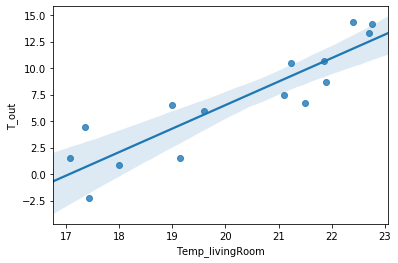

In [13]:
#regression plot
sns.regplot(x="Temp_livingRoom", y="T_out",data=simple_linear_reg_energy_data)

In [14]:
energy_data = pd.DataFrame(energy_data)
del energy_data['datetime']

In [15]:
energy_data = pd.DataFrame(energy_data)
del energy_data['lights']

In [16]:
#Mean Absolute Error (MAE)

#Firstly, we normalise our dataset to a common scale using the min max scaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
features_df = normalised_df.drop(columns=['Temp_livingRoom', 'T_out'])
dt = normalised_df['Temp_livingRoom']

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
#fit the model to the training dataset
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, dt, test_size=0.3, random_state=1)

In [18]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [19]:
#R-Squared 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.96

In [20]:
#Mean Absolute Error (MAE)

#Firstly, we normalise our dataset to a common scale using the min max scaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
features_df = normalised_df.drop(columns=['Appliances'])
dt1 = normalised_df['Appliances']

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
#fit the model to the training dataset
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, dt1, test_size=0.3, random_state=42)

In [22]:
import statsmodels.api as sm
X = x_train
y = y_train
X_constant = sm.add_constant(X)
lr = sm.OLS(y,X).fit()
predictions = lr.predict(x_test)
#lr.summary()

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
round(mae, 2)

0.05

In [24]:
#Residual Sum of Squares (RSS) 
rss = np.sum(np.square(y_test - predictions))
round(rss, 2) 

45.49

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.088

In [26]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predictions)
round(r2_score, 2)

0.15

In [27]:
#Ridge Regression 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train) 
 
#Feature Selection and Lasso Regression 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
rmse1 = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse1, 3)

0.088

In [29]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [30]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [31]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [32]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
#final_weights = pd.merge(ridge_weights_df, lasso_weights_df, on='Features')

In [33]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Hum_livingRoom,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,Temp_livingRoom,-0.236178,-0.201397,0.000000
3,Temp_parentroom,-0.189941,-0.188916,-0.000000
4,Hum_teenroom,-0.157595,-0.156830,-0.000110
5,Hum_outside,-0.077671,-0.054724,-0.049557
6,Hum_ironroom,-0.044614,-0.045977,-0.000000
7,Hum_parentroom,-0.039800,-0.041367,-0.000000
8,Temp_bathroom,-0.015657,-0.019853,-0.000000
9,Temp_kitchen,-0.003281,-0.018406,0.000000


In [34]:
rmse2 = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse2, 3)

0.088